In [384]:
#Author: Xavier Aguas
# Project Analysis Name: Earthquakes, 1965-2016


In [385]:
import numpy as np
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import seaborn as sns; sns.set()
from matplotlib.pyplot import figure

# stat on data
from scipy import stats
from scipy.stats import norm, skew


In [386]:
#Load dataset
df = pd.read_csv(r"./database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [387]:
print('Shape of the file')
print('-'*30)
print(df.shape)


Shape of the file
------------------------------
(23412, 21)


In [388]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='gray', linestyle='-')
    plt.title('Valores NaN en cada característica', fontsize=20, weight='bold', color="gray" )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Características con más de {thresh}% de NaN', fontsize=12, color='gray',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Características con menos de {thresh} de NaN', fontsize=12, color='gray',
         ha='left' ,va='top')
    plt.xlabel('Características')
    plt.ylabel('Porcentaje de valores NaN')
    
    return plt.show()

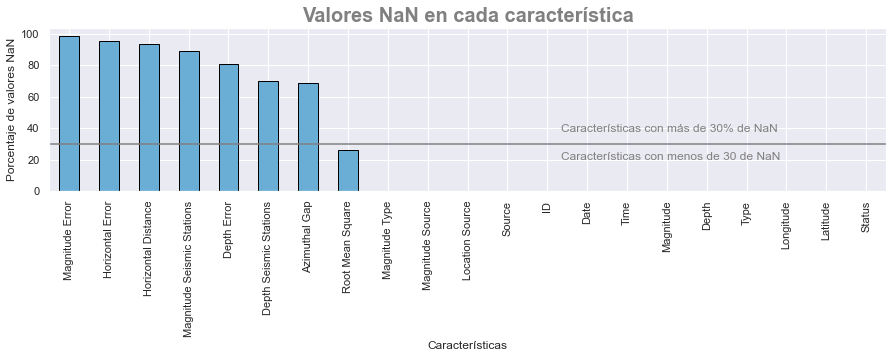

In [389]:
msv1(df, 30, color=sns.color_palette('Blues',n_colors=1))

In [390]:
# drop all the columns with more than 30% of missing values
df = df.dropna(thresh=len(df)*0.70, axis=1)

In [391]:
# create list with columns having NaN values
col_with_NaN_value = df.columns[df.isnull().any()]
# create df with only columns having NaN value 
df_nan = df[col_with_NaN_value]
# count number of NaN value per columns
print('Number of NaN values')
print('-'*30)
df_nan.isnull().sum()

Number of NaN values
------------------------------


Magnitude Type         3
Root Mean Square    6060
dtype: int64

In [392]:
# drop rows with the 3 missing values in 'magnitude type'
df = df.dropna(subset=['Magnitude Type'])

# replace nan value in RMS with mean columns
df['Root Mean Square'] = df['Root Mean Square'].fillna(value=df['Root Mean Square'].mean())

# verify operations:
df.isnull().sum()

# reset index
df = df.reset_index()

In [393]:
#exploring the length of date objects
lengths = df["Date"].str.len()
lengths.value_counts()

10    23406
24        3
Name: Date, dtype: int64

In [394]:
#having a look at the fishy datapoints
wrongdates = np.where([lengths == 24])[1]
print("Row index with wrong dates:", wrongdates)
df.loc[wrongdates]

Row index with wrong dates: [ 3378  7510 20647]


,index,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,5.6,MB,1.022784,USP0000A09,US,US,US,Reviewed
7510,7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,5.6,MW,1.300000,USP0002E81,US,US,HRV,Reviewed
20647,20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,5.8,MWC,1.060000,USP000HWQP,US,US,GCMT,Reviewed


In [395]:
#fixing the wrong dates 
df.loc[3378, "Date"] = "02/23/1975"  
df.loc[7510, "Date"] = "04/28/1985"
df.loc[20647, "Date"] = "03/13/2011"

#fixing the wrong Time 
df.loc[3378, "Time"] = "02:58:41"  
df.loc[7510, "Time"] = "02:53:41"
df.loc[20647, "Time"] = "02:23:34"

In [396]:
#exploring the length of time objects
lengths = df["Time"].str.len()
lengths.value_counts()

8    23409
Name: Time, dtype: int64

In [397]:
# datetime conversions merge Date + Time
df['datetime'] = df.Date+' '+df.Time
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M:%S')

# drop irrelevant columns
df = df.drop(['Date', 'Time','index'], axis=1)

In [398]:
# Print unique values for categorical variables:
print('Type: ', df['Type'].unique(), "\n")
print('Magnitude Type', df['Magnitude Type'].unique(), "\n")
print('Source', df['Source'].unique(), "\n")
print('Location Source', df['Location Source'].unique(), "\n")          
print('Magnitude Source', df['Magnitude Source'].unique(), "\n")
print('Status', df['Status'].unique(), "\n")

Type:  ['Earthquake' 'Nuclear Explosion' 'Explosion' 'Rock Burst'] 

Magnitude Type ['MW' 'ML' 'MH' 'MS' 'MB' 'MWC' 'MD' 'MWB' 'MWW' 'MWR'] 

Source ['ISCGEM' 'ISCGEMSUP' 'OFFICIAL' 'CI' 'US' 'NC' 'GCMT' 'UW' 'NN' 'SE' 'AK'
 'PR'] 

Location Source ['ISCGEM' 'CI' 'US' 'H' 'U' 'G' 'NC' 'B' 'GCMT' 'AG' 'UW' 'SPE' 'HVO'
 'BRK' 'AGS' 'PGC' 'BOU' 'SLC' 'OTT' 'AEI' 'AEIC' 'CASC' 'ISK' 'ATH' 'THE'
 'ROM' 'MDD' 'WEL' 'GUC' 'UNM' 'CSEM' 'RSPR' 'JMA' 'NN' 'CAR' 'SJA' 'TEH'
 'BEO' 'UCR' 'SE' 'TUL' 'TAP' 'THR' 'LIM' 'US_WEL' 'AK' 'PR'] 

Magnitude Source ['ISCGEM' 'OFFICIAL' 'CI' 'US' '1020' 'BRK' 'NC' '1000' 'GCMT' '1009' 'UW'
 '1023' 'HRV' 'PAR' 'NIED' 'NN' 'SE' 'PGC' 'US_GCMT' 'US_PGC' 'AK' 'PR'
 'GUC'] 

Status ['Automatic' 'Reviewed'] 



In [399]:
df['date_parsed'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)
df['year'] = df["date_parsed"].apply(lambda x: x.year)
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,datetime,date_parsed,year
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18,1965-01-02 13:44:18,1965
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49,1965-01-04 11:29:49,1965
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58,1965-01-05 18:05:58,1965
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43,1965-01-08 18:49:43,1965
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50,1965-01-09 13:32:50,1965


In [400]:
def graph (magn_floor, magn_ceil):
    new_df = df
    new_df = new_df.loc[(df.Magnitude > magn_floor) & (df.Magnitude < magn_ceil)]

    figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title('Número de Terremotos desde 1965 a 2016', fontsize=20, weight='bold', color='gray')
    plt.xlabel('Años')
    plt.ylabel('Número Terremotos')
    
    value_counts = new_df['year'].value_counts().sort_index()
    value_counts.plot(kind='line')
    a = []
    b = []
    plt.show()

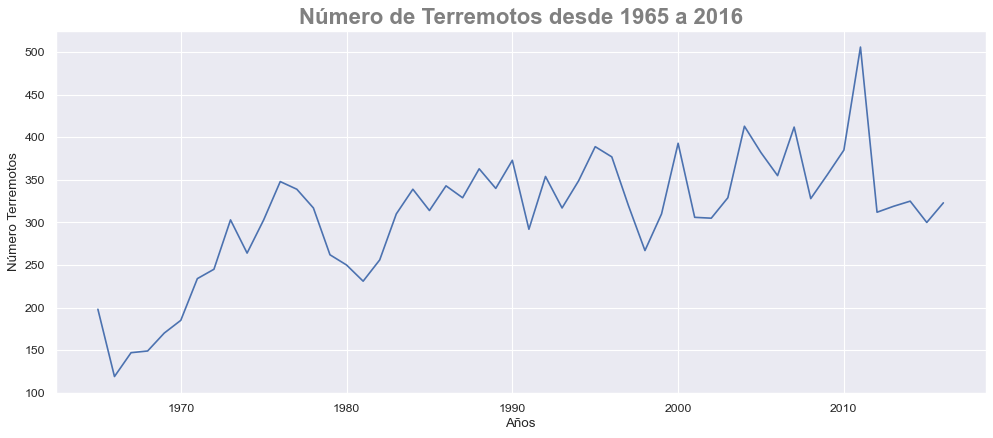

In [401]:
graph (5, 6)

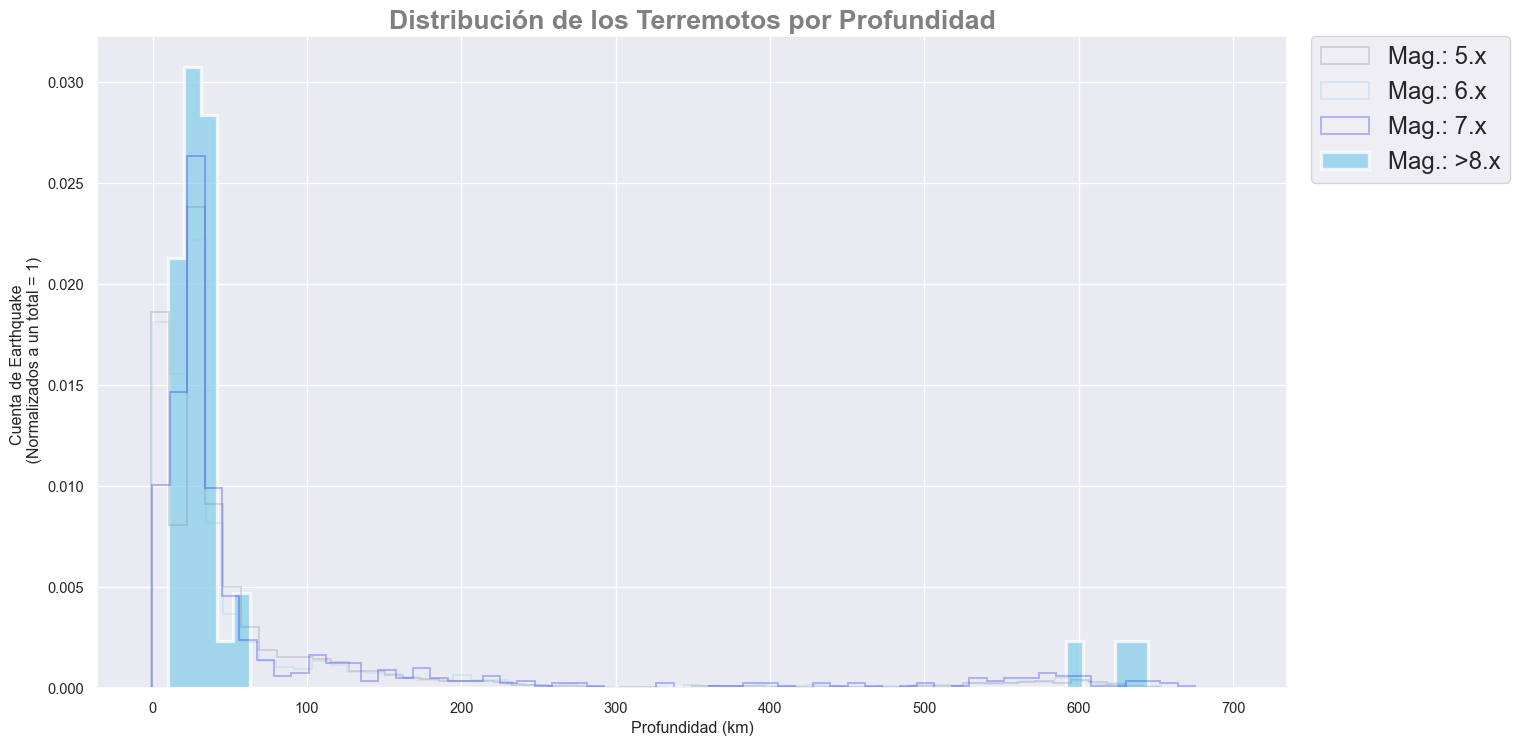

In [402]:
ti = "Distribución de los Terremotos por Profundidad"
fig, ax = plt.subplots(figsize=(16, 9), dpi=96 )
colors = ["gray", "skyblue", "blue", "purple"]
ncolor = 0

for i in range(5,8,1):
    tmp = df[(df["Magnitude"]>=i)&(df["Magnitude"]<i+1)&(df["Type"]=="Earthquake")]
    plt.hist(tmp["Depth"], bins=60, density=True, histtype='step', linewidth=1.5, label=f"Mag.: {i}.x",color=colors[ncolor],alpha=0.25) 
    ncolor+=1

tmp = df[(df["Magnitude"]>=8)]
plt.hist(tmp["Depth"], bins=60, density=True, histtype='stepfilled', linewidth=2.5, label=f"Mag.: >8.x", color='skyblue', alpha=0.75 )
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Profundidad (km)")
plt.ylabel("Cuenta de Earthquake \n (Normalizados a un total = 1)")
plt.title(f"{ti}",fontsize=20, weight='bold', color='gray')

ax_pos = ax.get_position()
plt.show()

<Figure size 432x288 with 0 Axes>

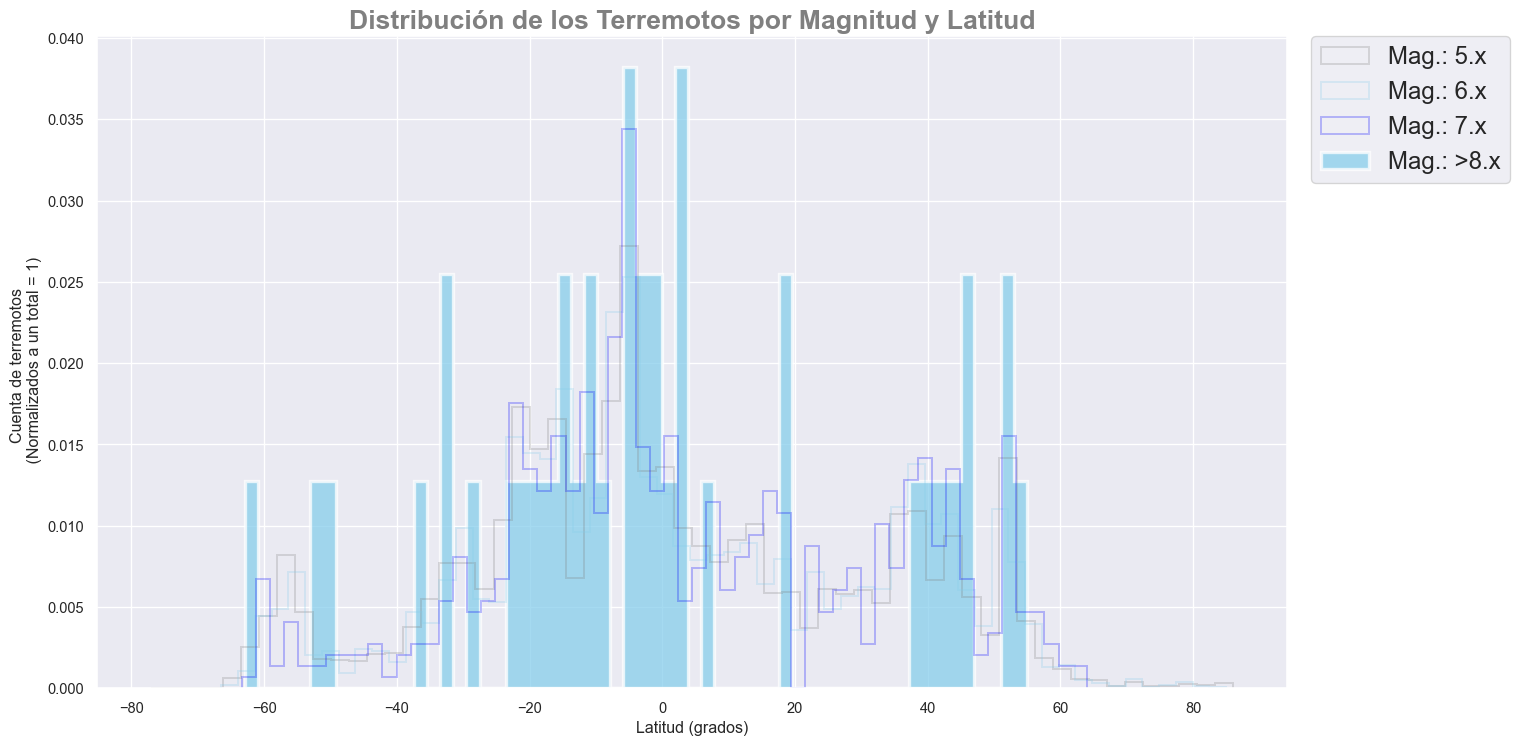

In [403]:
plt.clf()
ti = "Distribución de los Terremotos por Magnitud y Latitud"
fig, ax = plt.subplots(figsize=(16, 9), dpi=96)
plt.rcParams["font.size"] = 24
colors = ["gray", "skyblue", "blue", "purple"]
ncolor = 0


#
for i in range(5,8,1):
    tmp = df[(df["Magnitude"]>=i)&(df["Magnitude"]<i+1)&(df["Type"]=="Earthquake")]
    plt.hist(tmp["Latitude"], bins=60, density=True, histtype='step', linewidth=1.5, label=f"Mag.: {i}.x", color=colors[ncolor], alpha=0.25)
    ncolor+=1
    
tmp = df[(df["Magnitude"]>=8)]
plt.hist(tmp["Latitude"], bins=60, density=True, histtype='stepfilled', linewidth=2.5, label=f"Mag.: >8.x", color='skyblue', alpha=0.75)
#
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.xlabel("Latitud (grados)")
plt.ylabel("Cuenta de terremotos \n (Normalizados a un total = 1)")
plt.title(f"{ti}",fontsize=20, weight='bold', color='gray')
ax_pos = ax.get_position()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Magnitud vs Profundidad'}, xlabel='Magnitud (Richter)', ylabel='Profundidad (km)'>

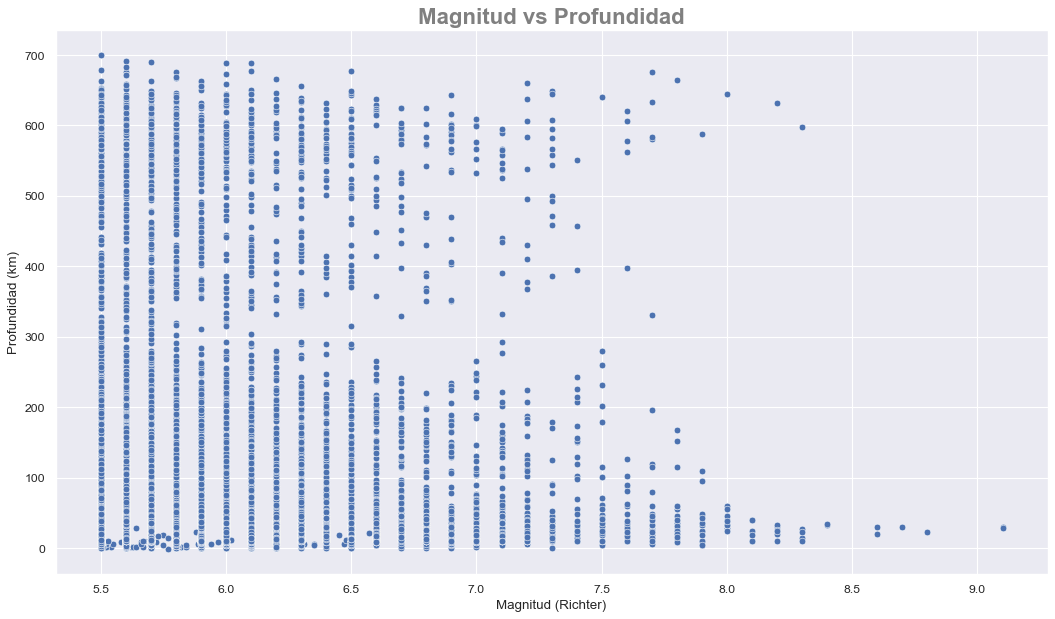

In [404]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

plt.title('Magnitud vs Profundidad',fontsize=20, weight='bold', color='gray')
plt.xlabel('Magnitud (Richter)')
plt.ylabel('Profundidad (km)')

sns.scatterplot(df['Magnitude'].values, df['Depth'].values, palette='PuBuGn_d')